# Pandas DataFrames

* [A nice tutorial](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python#gs.GxzCRGk)

Pandas essential is a collection of data structures. The one we will use the most is the DataFrame (borrowed in many ways from R). It's basically a 2D array, but with some additionality to make data munging and analysis much, much easier and cleaner. 


In [1]:
import pandas as pd
import numpy as np

### creating `DataFrame`s

In [3]:
data = np.array([['','Col1','Col2'],
                ['Row1',1,2],
                ['Row2',3,4]])
                
frame = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])

frame

,Col1,Col2
Row1,1,2
Row2,3,4


In [4]:
a = np.array([1,2,3,4])
b = ['one', 'two', 'three', 'four']

frame = pd.DataFrame({'numbers':a, 'names':b})

frame

,numbers,names
0,1,one
1,2,two
2,3,three
3,4,four


### rows, columns, and indexing

In [5]:
frame['names']

0      one
1      two
2    three
3     four
Name: names, dtype: object

In [16]:
frame.names

0      one
1      two
2    three
3     four
Name: names, dtype: object

In [12]:
frame[:2]

,numbers,names
0,1,one
1,2,two


In [19]:
frame.names[:2]

0    one
1    two
Name: names, dtype: object

In [22]:
frame[1:2]

,numbers,names
1,2,two


In [27]:
frame.iloc[2]

numbers        3
names      three
Name: 2, dtype: object

In [31]:
for i,row in frame.iterrows(): # :(
    print(i, row['names'], row.numbers)

0 1 1
1 2 2
2 3 3
3 4 4


### masking

In [42]:
frame[frame.numbers < 3]

,numbers,names
0,1,one
1,2,two


### creating new columns

In [50]:
frame['new_col'] = [5,6,7,8]

frame

,numbers,names,new_col
0,1,one,5
1,2,two,6
2,3,three,7
3,4,four,8


### merging dataframes

* merge, join, concat... https://pandas.pydata.org/pandas-docs/stable/merging.html

In [51]:
frame2 = pd.DataFrame({'names':b, 'yet_another_col':[-1,-2,-3,-4]})
pd.merge(frame, frame2) # this worked because it merged on the 'name' column which exists in both dataframes

,numbers,names,new_col,yet_another_col
0,1,one,5,-1
1,2,two,6,-2
2,3,three,7,-3
3,4,four,8,-4


### loading files (csv, json, ...)

In [58]:
data = pd.read_csv('data/pnp-train.txt',names=['type','name'], delimiter='\t', encoding='ISO-8859-1')

data[:10]

,type,name
0,drug,Dilotab
1,movie,Beastie Boys: Live in Glasgow
2,person,Michelle Ford-Eriksson
3,place,Ramsbury
4,place,Market Bosworth
5,drug,Cyanide Antidote Package
6,person,Bill Johnson
7,place,Ettalong
8,movie,The Suicide Club
9,place,Pézenas


### deriving new columns from existing columns

In [64]:
data['first_letter'] = data.name.str[0]

data[:3]

,type,name,first_word,first_letter
0,drug,Dilotab,dilotab,D
1,movie,Beastie Boys: Live in Glasgow,beastie,B
2,person,Michelle Ford-Eriksson,michelle,M


### map and lambda functions

In [65]:
data['first_word'] = data.name.map(lambda x: x.lower().split()[0])

data[:3]

,type,name,first_word,first_letter
0,drug,Dilotab,dilotab,D
1,movie,Beastie Boys: Live in Glasgow,beastie,B
2,person,Michelle Ford-Eriksson,michelle,M


#### the cell below is equivalent to the cell above; one function is lambda, the other is explicitely declared

In [66]:
def get_first_word(s):
    return s.lower().split()[0]

data['first_word'] = data.name.map(get_first_word)

data[:3]

,type,name,first_word,first_letter
0,drug,Dilotab,dilotab,D
1,movie,Beastie Boys: Live in Glasgow,beastie,B
2,person,Michelle Ford-Eriksson,michelle,M


### column renaming and deleting

In [67]:
data = data.rename(index=str, columns={"first_letter": "lame_column"})

data[:3]

,type,name,first_word,lame_column
0,drug,Dilotab,dilotab,D
1,movie,Beastie Boys: Live in Glasgow,beastie,B
2,person,Michelle Ford-Eriksson,michelle,M


In [68]:
data.drop('lame_column', axis=1) 

data[:3]

,type,name,first_word,lame_column
0,drug,Dilotab,dilotab,D
1,movie,Beastie Boys: Live in Glasgow,beastie,B
2,person,Michelle Ford-Eriksson,michelle,M


### why wasn't the column dropped??

* see above: we always have to store the result in `data`. Alternatively, we can use `inplace=True`

In [70]:
data.drop('lame_column', axis=1, inplace=True) # same as: data = drop('lame_column', axis=1)

data[:3]

KeyError: "['lame_column'] not found in axis"

### serialized objects: pickles

In [71]:
data.to_pickle('names.pkl')

data = pd.read_pickle('names.pkl')

data[:3]

,type,name,first_word
0,drug,Dilotab,dilotab
1,movie,Beastie Boys: Live in Glasgow,beastie
2,person,Michelle Ford-Eriksson,michelle


### making discrete data continuous: one-hot vectors

* Why do it this way? Why not represent the features as just indexes?
* Is there a better way?

In [76]:
dummies = pd.get_dummies(data.first_word)

dummies[:3]

,$windle,'n,...,...and,...or,...und,0.12h,007,008,02:06,...,écosaimale?,épouse-moi,érase,év,ìáîäùû,íslenski,îï×ùå,óôáòùå,über,þåë
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### converting to matrices: features to scikit 

In [78]:
X = dummies.as_matrix()

X.shape

(21001, 13703)

#### label encoder

In [79]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data.type)

y = le.transform(data.type)

y.shape, set(y), set(data.type)

((21001,), {0, 1, 2, 3, 4}, {'company', 'drug', 'movie', 'person', 'place'})

In [68]:
data[:3]

,type,name,first_word
0,drug,Dilotab,dilotab
1,movie,Beastie Boys: Live in Glasgow,beastie
2,person,Michelle Ford-Eriksson,michelle


In [71]:
# run this cell to use a LabelEncoder for the features (X)
leX = preprocessing.LabelEncoder()
leX.fit(data.first_word)
X = leX.transform(data.first_word)
X = X.reshape(X.shape[0], 1)

X.shape, len(set(data.first_word))

((21001, 1), 13703)

In [80]:
from sklearn import linear_model

model = linear_model.LogisticRegression(penalty='l2')
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### scikitlearn metrics

* WARNING!!! evaluating on training data!!!!

In [83]:
from sklearn.metrics import *

accuracy_score(model.predict(X), y) # <-- training data!!! bad!! (but makes showing this easier)

0.9018618161039951

There is so much more than just accuracy.... http://scikit-learn.org/stable/modules/classes.html

In [84]:
f1_score(model.predict(X), y, average='macro') 

0.8634680576288897

### shifting and NAs

In [85]:
frame['shifted_names'] = frame.names.shift(-2)

frame

,names,numbers,new_col,shifted_names
0,one,1,5,three
1,two,2,6,four
2,three,3,7,NaN
3,four,4,8,NaN


In [41]:
frame.fillna('hamburgers')

,names,numbers,new_col,shifted_names
0,one,1,5,three
1,two,2,6,four
2,three,3,7,hamburgers
3,four,4,8,hamburgers


### plotting

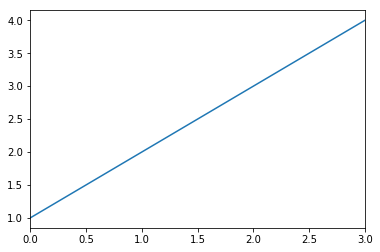

In [46]:
#need this to show plots in the dataframe
%matplotlib inline 

frame.numbers.plot()

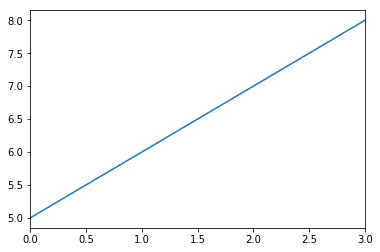

In [50]:
frame.new_col.plot()